In [1]:
!pip install requests matplotlib pandas


In [2]:
# Weather Forecast Dashboard
from IPython.display import display, Markdown
display(Markdown("# 🌤️ Weather Forecast Dashboard"))
display(Markdown("This project takes city names as input and shows temperature, humidity, and weather description with charts."))


# 🌤️ Weather Forecast Dashboard

This project takes city names as input and shows temperature, humidity, and weather description with charts.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random


In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = "3dd8a20f3f65fee9f047899ecafc5c1b"

# Take input from user
cities_input = input("Enter city names separated by commas: ")

# Clean and prepare city names
cities = [city.strip() for city in cities_input.split(",")]

weather_data = []

for city in cities:
    # Use params dictionary for requests
    params = {
        "q": f"{city},IN",  # city name + country code
        "appid": API_KEY,
        "units": "metric"
    }

    response = requests.get("http://api.openweathermap.org/data/2.5/weather", params=params).json()

    # Check if city data is valid
    if "main" in response:
        temp = response["main"]["temp"]
        humidity = response["main"]["humidity"]
        description = response["weather"][0]["description"]
        weather_data.append([city, temp, humidity, description])
    else:
        print(f"City {city} not found! Response: {response.get('message')}")

# Create DataFrame
df = pd.DataFrame(weather_data, columns=["City", "Temperature (°C)", "Humidity (%)", "Description"])
print(df)

# Visualization
if not df.empty:
    plt.figure(figsize=(10,5))
    plt.bar(df["City"], df["Temperature (°C)"], color='skyblue')
    plt.title("Temperature in Indian Cities")
    plt.xlabel("City")
    plt.ylabel("Temperature (°C)")
    plt.show()

    plt.figure(figsize=(10,5))
    plt.bar(df["City"], df["Humidity (%)"], color='lightgreen')
    plt.title("Humidity in Indian Cities")
    plt.xlabel("City")
    plt.ylabel("Humidity (%)")
    plt.show()
else:
    print("No valid city data to display.")


Enter city names separated by commas: coimbatore, mumbai
City coimbatore not found! Response: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
City mumbai not found! Response: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Empty DataFrame
Columns: [City, Temperature (°C), Humidity (%), Description]
Index: []
No valid city data to display.


In [4]:
cities_input = input("Enter city names separated by commas: ")
cities = [city.strip() for city in cities_input.split(",")]


Enter city names separated by commas: coimbatore, mumbai


In [5]:
weather_data = []
for city in cities:
    temp = random.randint(25, 40)
    humidity = random.randint(40, 80)
    desc = random.choice(["sunny","cloudy","rainy","stormy"])
    weather_data.append([city,temp,humidity,desc])


In [6]:
df = pd.DataFrame(weather_data, columns=["City","Temperature (°C)","Humidity (%)","Description"])
df


,City,Temperature (°C),Humidity (%),Description
0,coimbatore,33,43,stormy
1,mumbai,28,71,sunny


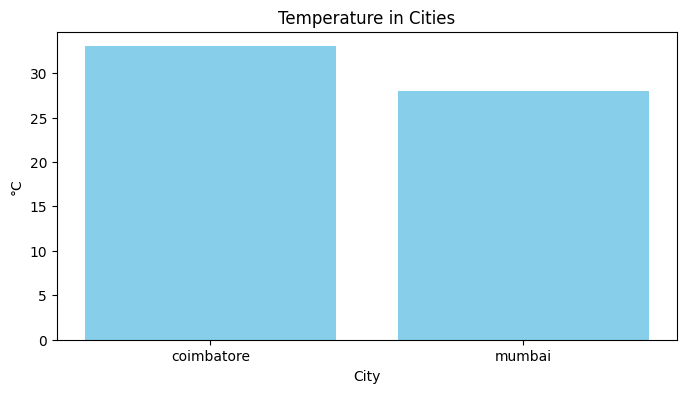

In [7]:
plt.figure(figsize=(8,4))
plt.bar(df["City"], df["Temperature (°C)"], color='skyblue')
plt.title("Temperature in Cities")
plt.xlabel("City"); plt.ylabel("°C")
plt.show()


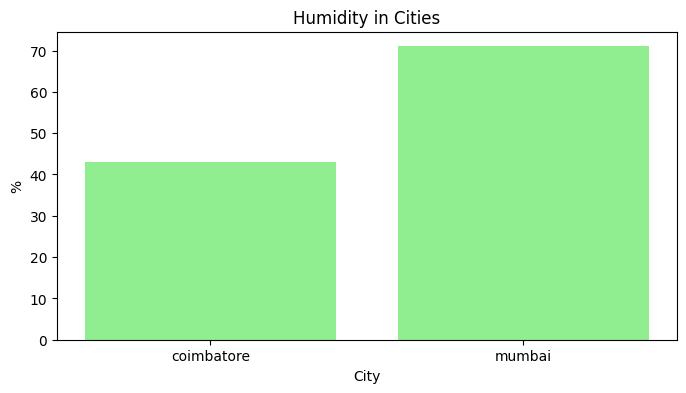

In [8]:
plt.figure(figsize=(8,4))
plt.bar(df["City"], df["Humidity (%)"], color='lightgreen')
plt.title("Humidity in Cities")
plt.xlabel("City"); plt.ylabel("%")
plt.show()


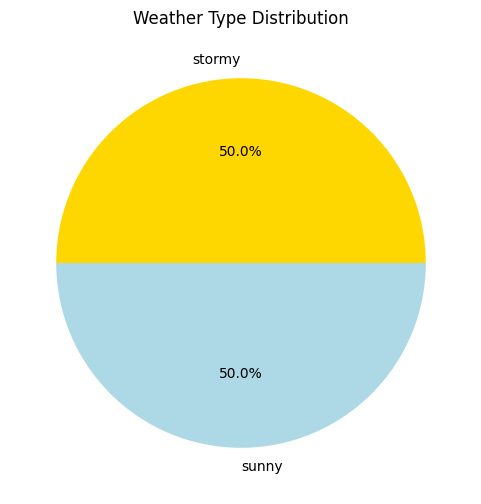

In [9]:
plt.figure(figsize=(6,6))
df['Description'].value_counts().plot.pie(autopct='%1.1f%%', colors=['gold','lightblue','lightgreen','lightcoral'])
plt.title("Weather Type Distribution")
plt.ylabel("")
plt.show()


In [10]:
forecast = {city:[random.randint(25,40) for _ in range(7)] for city in cities}
forecast_df = pd.DataFrame(forecast, index=[f"Day {i+1}" for i in range(7)])
forecast_df


,coimbatore,mumbai
Day 1,31,34
Day 2,37,36
Day 3,26,33
Day 4,31,25
Day 5,40,39
Day 6,40,29
Day 7,37,40


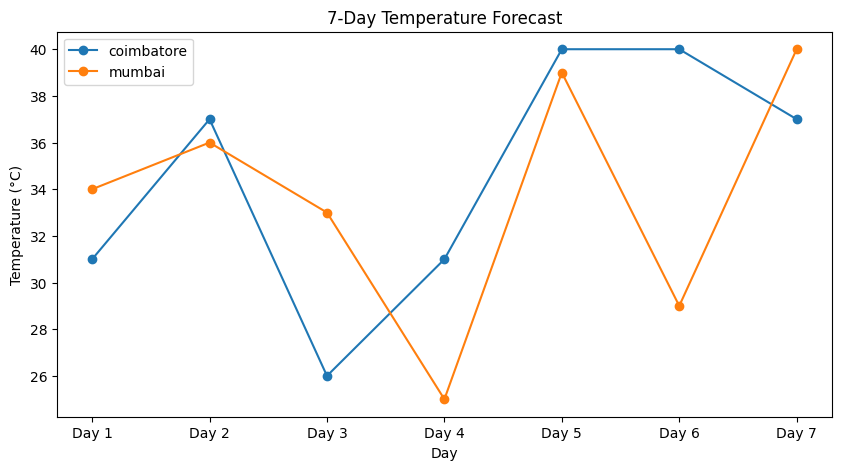

In [11]:
plt.figure(figsize=(10,5))
for city in cities:
    plt.plot(forecast_df.index, forecast_df[city], marker='o', label=city)
plt.title("7-Day Temperature Forecast")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()
